<a href="https://colab.research.google.com/github/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/blob/main/ProjectMachineLearningA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - **Engine data**
### Machine Learning - MMN 4
#### *MACCHI Nicola, KABIR Mohamed, LOUIS Viny-Paul TEst*

### About Dataset

The dataset could include various features and measurements related to the engine health of vehicles, such as engine RPM, temperature, pressure, and other sensor data. It may also include metadata on the vehicle, such as make, model, year, and mileage.

### Why

This dataset could be used to develop a predictive maintenance model for automotive engines. By analyzing trends, artificial intelligence could anticipate repair needs, helping owners and mechanics to intervene before a breakdown occurs. This would improve the performance and longevity of engines.

Another possible application would be the comparative analysis of the performance of different engines and vehicles. This would allow researchers to evaluate the most effective manufacturers or maintenance strategies that foster innovation in the automotive sector.

In [ ]:
from google.colab import drive
csv_path ="/content/drive/MyDrive/Colab Notebooks/engine_data.csv"
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/engine_data.csv" )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import joblib

sns.set(style="whitegrid")

In [ ]:
print("File:", csv_path)
print("Shape:", df.shape)
display(df.head(10))

File: /content/drive/MyDrive/Colab Notebooks/engine_data.csv
Shape: (19535, 7)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [ ]:
target_col = "Engine Condition"
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found. Columns: {list(df.columns)}")
if not pd.api.types.is_categorical_dtype(df[target_col]):
    df[target_col] = df[target_col].astype('category')

num_cols = [c for c in df.select_dtypes(include=[np.number]).columns.tolist() if c != target_col]
print("Numeric feature columns:", num_cols)

Numeric feature columns: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']


/tmp/ipython-input-3097359956.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[target_col]):


In [ ]:
print("\n--- Dtypes & Non-null counts ---")
display(df.info())


--- Dtypes & Non-null counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Engine rpm        19535 non-null  int64   
 1   Lub oil pressure  19535 non-null  float64 
 2   Fuel pressure     19535 non-null  float64 
 3   Coolant pressure  19535 non-null  float64 
 4   lub oil temp      19535 non-null  float64 
 5   Coolant temp      19535 non-null  float64 
 6   Engine Condition  19535 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 935.0 KB


None

In [ ]:
print("\n--- Numeric summary (describe) ---")
display(df[num_cols].describe().T)


--- Numeric summary (describe) ---


,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912


In [ ]:
print("\n--- Missing values per column ---")
missing = df.isnull().sum()
display(missing)


--- Missing values per column ---


,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


In [ ]:
print("\n--- Target 'Engine Condition' value counts ---")
display(df[target_col].value_counts())
display(df[target_col].value_counts(normalize=True).round(3))


--- Target 'Engine Condition' value counts ---


,count
Engine Condition,
1,12317
0,7218


,proportion
Engine Condition,
1,0.631
0,0.369


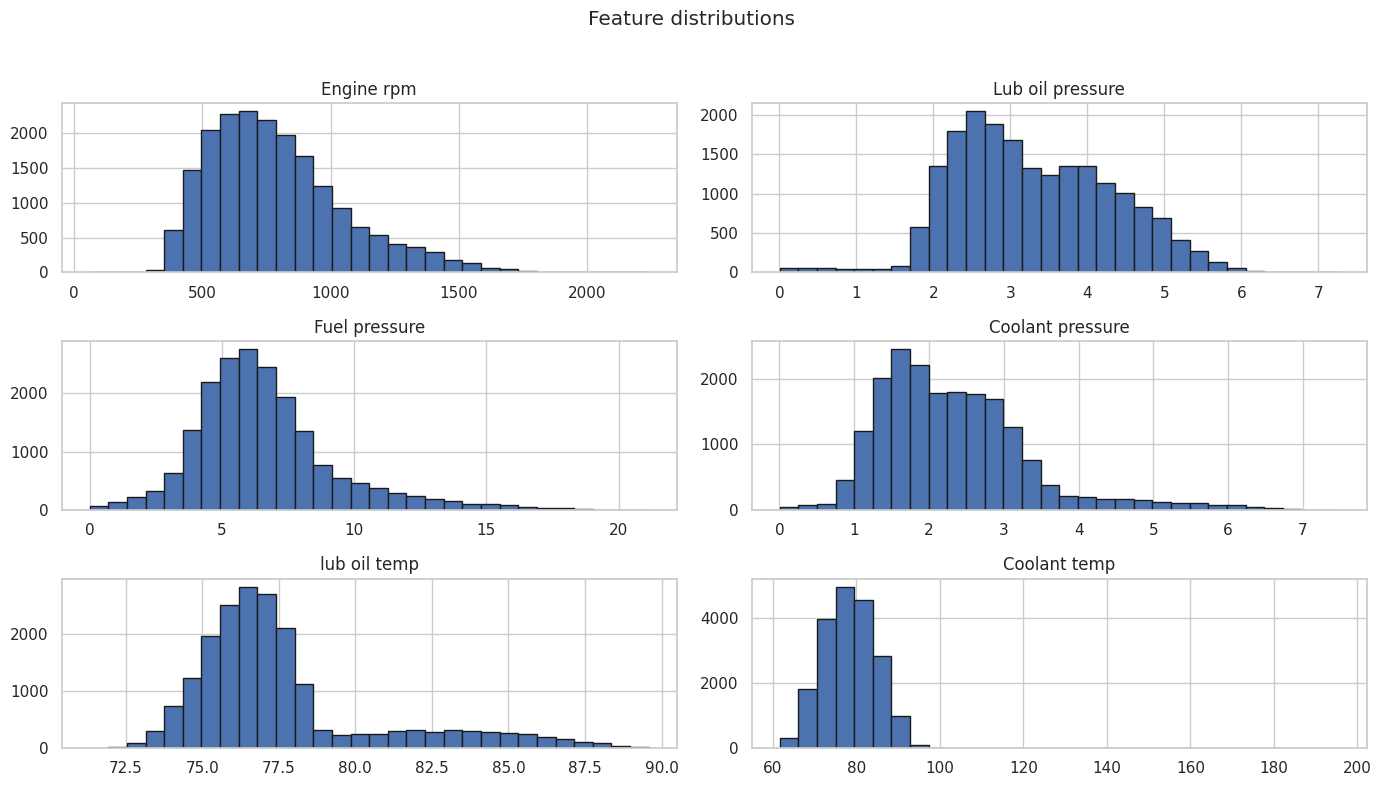

In [ ]:
if len(num_cols) > 0:
    df[num_cols].hist(bins=30, figsize=(14, 8), edgecolor='k')
    plt.suptitle("Feature distributions")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("No numeric feature columns found to plot histograms.")

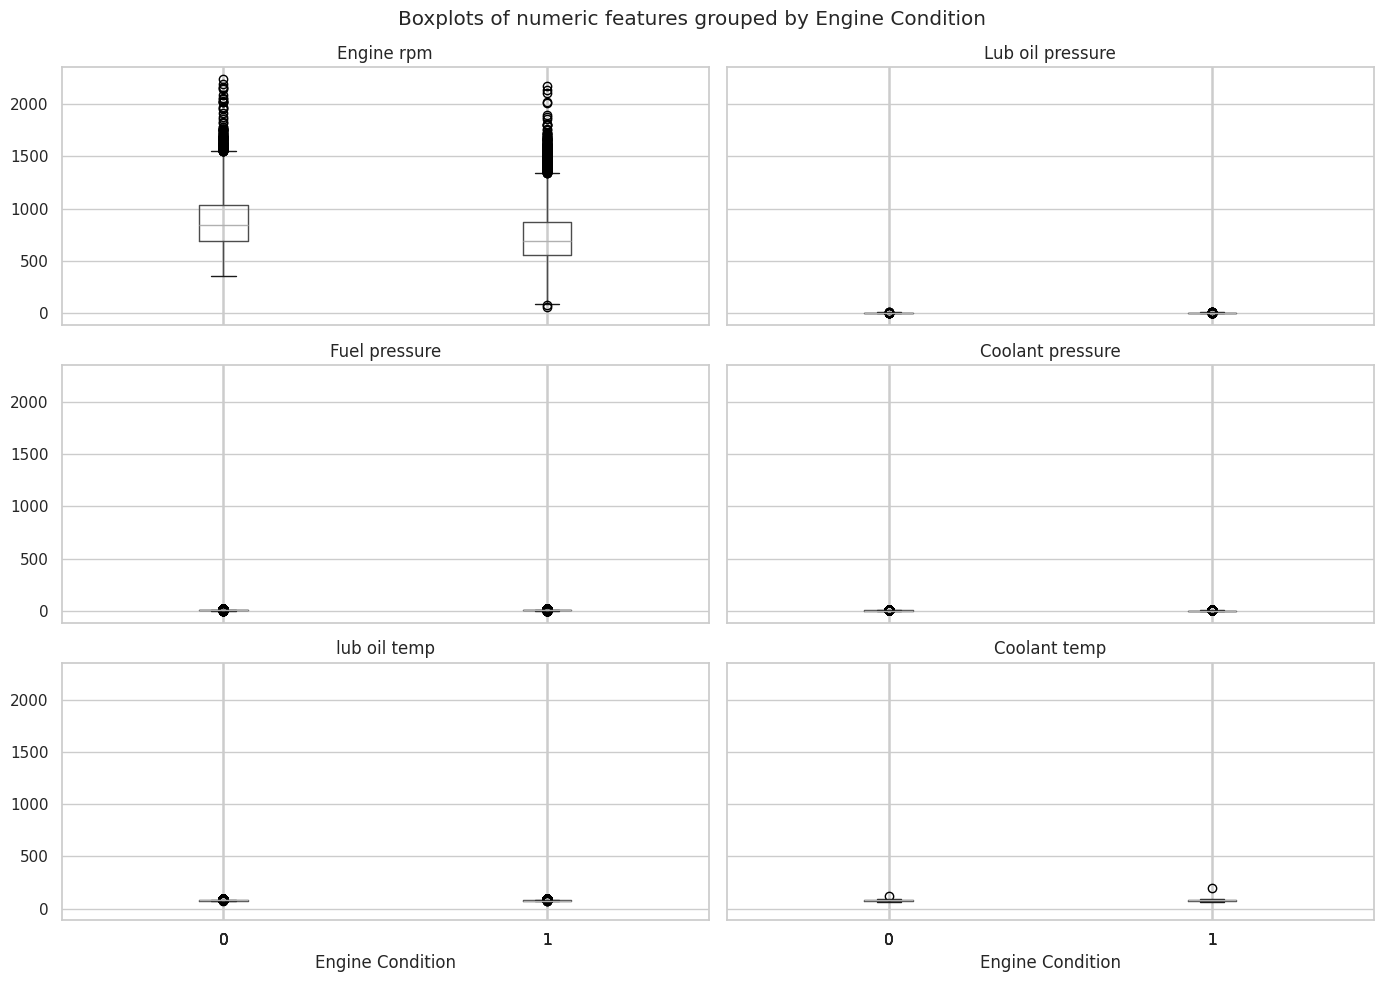

In [ ]:
if len(num_cols) > 0:
    # pandas boxplot grouped by target — pandas decides layout automatically
    _ = df.boxplot(column=num_cols, by=target_col, figsize=(14, 10))
    plt.suptitle("")   # remove the automatic 'by' title pandas adds
    plt.suptitle("Boxplots of numeric features grouped by Engine Condition")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric feature columns found to plot boxplots.")

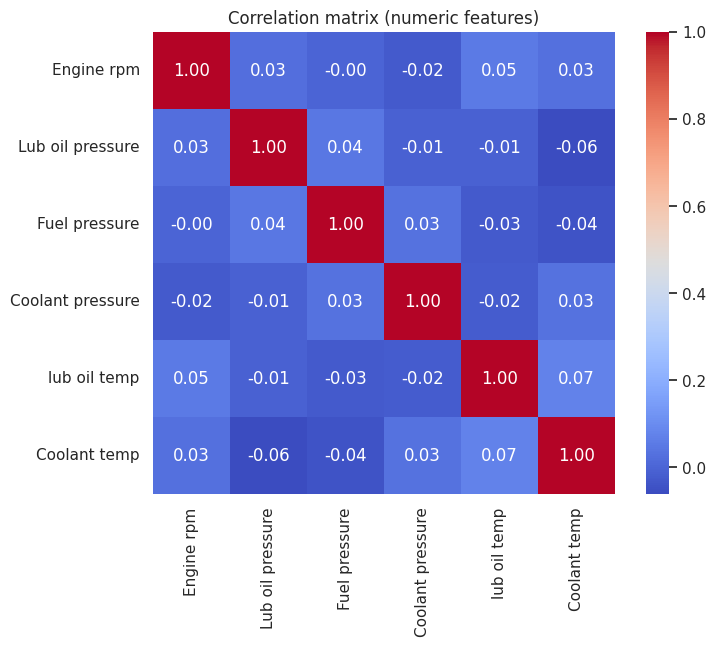

In [ ]:
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation matrix (numeric features)")
    plt.show()
else:
    print("Not enough numeric features for correlation matrix.")

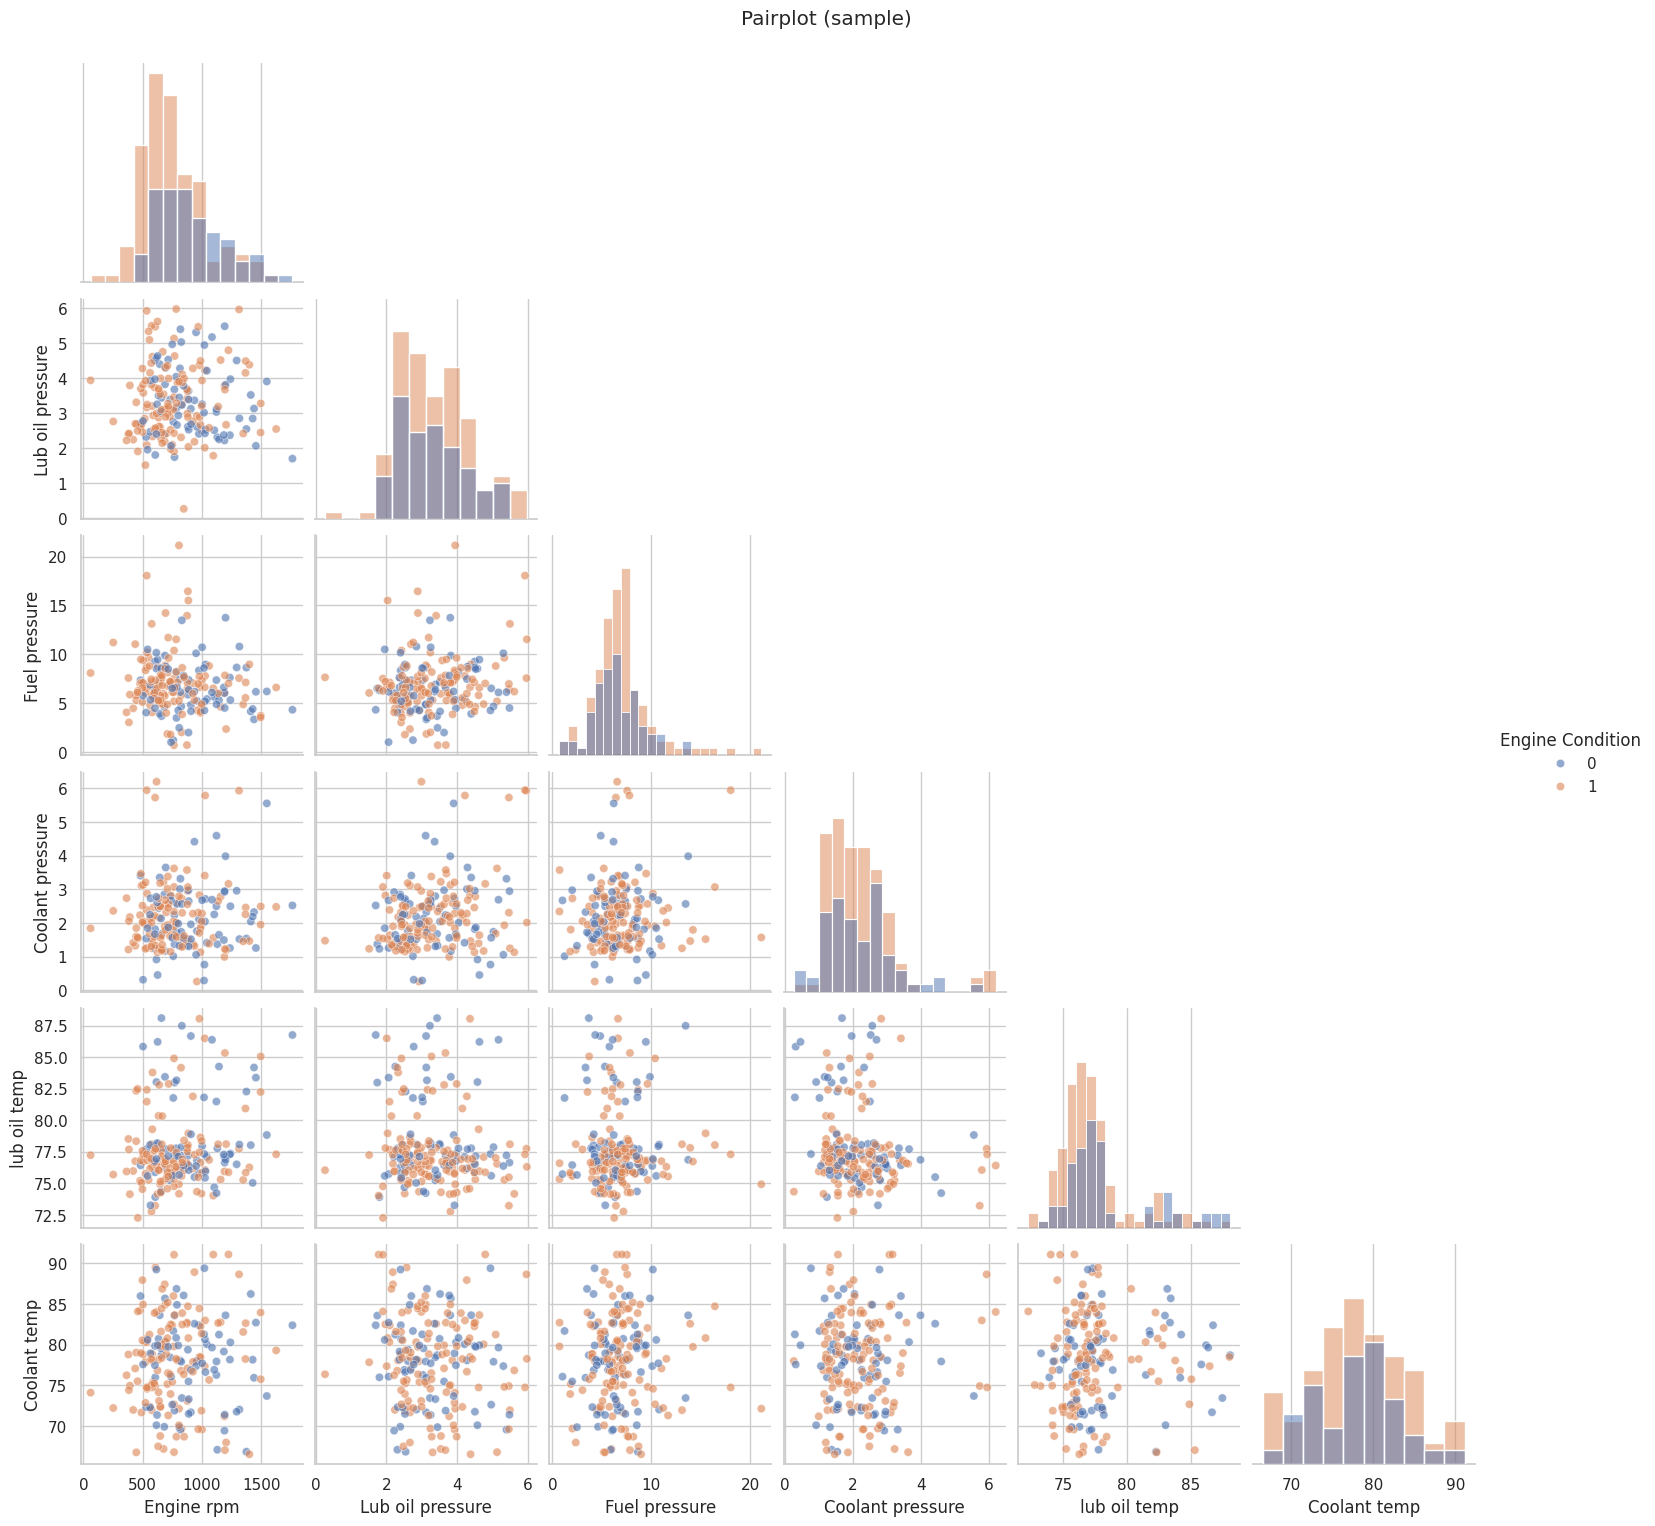

In [ ]:
sample_size = 200
if len(df) > sample_size:
    sample = df.sample(n=sample_size, random_state=42)
else:
    sample = df
# limit pairplot to numeric columns + target for hue
pairplot_cols = num_cols.copy()
if len(pairplot_cols) > 0:
    try:
        sns.pairplot(sample, vars=pairplot_cols, hue=target_col, diag_kind='hist', corner=True, plot_kws={'alpha':0.6})
        plt.suptitle("Pairplot (sample)", y=1.02)
        plt.show()
    except Exception as e:
        print("Pairplot failed (likely too many features / heavy). Error:", e)
else:
    print("No numeric features for pairplot.")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Data cleaning
df = df.dropna()
df = df.drop_duplicates()

#  Define features and target
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

#  Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  Verification section
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Shape after scaling:", X_scaled.shape)
print("\n Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nMean of scaled features (should be close to 0):")
print(X_scaled.mean().round(3))
print("\nStd of scaled features (should be close to 1):")
print(X_scaled.std().round(3))
print("\nDistribution of Engine Condition:")
print(y.value_counts(normalize=True).round(3))
print("\nPreprocessing complete and data ready for modeling!")


Shape of X (features): (19535, 6)
Shape of y (target): (19535,)
Shape after scaling: (19535, 6)

 Training set shape: (15628, 6)
Test set shape: (3907, 6)

Mean of scaled features (should be close to 0):
Engine rpm         -0.0
Lub oil pressure   -0.0
Fuel pressure       0.0
Coolant pressure   -0.0
lub oil temp        0.0
Coolant temp       -0.0
dtype: float64

Std of scaled features (should be close to 1):
Engine rpm          1.0
Lub oil pressure    1.0
Fuel pressure       1.0
Coolant pressure    1.0
lub oil temp        1.0
Coolant temp        1.0
dtype: float64

Distribution of Engine Condition:
Engine Condition
1    0.631
0    0.369
Name: proportion, dtype: float64

Preprocessing complete and data ready for modeling!


For step 3 : our problem is to predict if the engine is in good or bad condition. 0 means that the engine is in a bad state and 1 means the engine is in a good state.


In [ ]:
# --- Model Testing Section ---

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Initialize models
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "LinearRegression": LinearRegression(),  # Regression version
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Check if target is numeric or categorical
is_classification = y_train.dtype.name == 'category' or y_train.nunique() < 10

results = {}

for name, model in models.items():
    print(f"\n{'='*40}\nTraining {name}...\n{'='*40}")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    if is_classification and name != "LinearRegression":
        acc = accuracy_score(y_test, y_pred)
        print(f" Accuracy ({name}): {acc:.3f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        results[name] = acc
    else:
        # For LinearRegression or regression-type data
        mse = mean_squared_error(y_test.astype(float), y_pred.astype(float))
        print(f" MSE ({name}): {mse:.3f}")
        results[name] = mse

# --- Summary ---
print("\n=== Model Comparison ===")
for name, score in results.items():
    metric = "Accuracy" if is_classification and name != "LinearRegression" else "MSE"
    print(f"{name:20s} : {metric} = {score:.3f}")



Training SVM...
 Accuracy (SVM): 0.664

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.27      0.37      1444
           1       0.68      0.90      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.64      0.58      0.57      3907
weighted avg       0.65      0.66      0.62      3907


Confusion Matrix:
[[ 389 1055]
 [ 257 2206]]

Training RandomForest...
 Accuracy (RandomForest): 0.649

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1444
           1       0.69      0.80      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.60      0.60      3907
weighted avg       0.63      0.65      0.63      3907


Confusion Matrix:
[[ 564  880]
 [ 493 1970]]

Training KNN...
 Accuracy (KNN): 0.627

Classification Report:
              precision    recall  f1-score 